# Pseudomonas phages and related annotated proteins - PhageScope

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Goal 1: load all Pseudomonas phages from the PhageScope database 
The overview downloaded from the PhageScope database contains all Pseudomonas phages with metadata, such as taxonomy, hosts and genome annotation information. Size of the database: 87,601 Pseudomonas phages.

In [ ]:
data = pd.read_csv('pseudomonas.csv')

Brief statistics on the genomes. The metadata is from RefSeq, Genbank, EMBL, DDBJ, PhagesDB, GVD, GPD, MGV, TemPhD, CHVD, IGVD, IMG_VR, GOV2 and STV. 

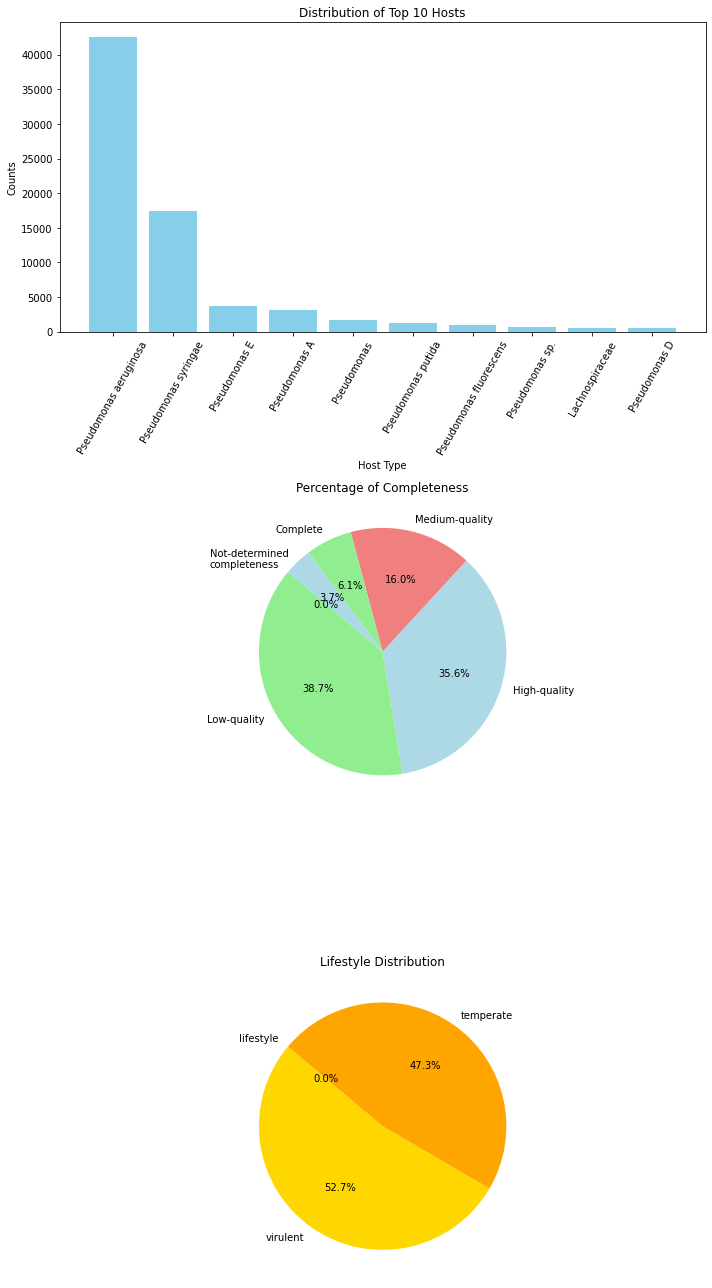

In [13]:
# Count of different hosts
host_counts = data['host'].value_counts()

# Percentage of completeness
completeness_counts = data['completeness'].value_counts(normalize=True) * 100

# Lifestyle distribution
lifestyle_counts = data['lifestyle'].value_counts(normalize=True) * 100

top_host_counts = host_counts.sort_values(ascending=False).head(10)
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Host distribution for top 10 hosts
axes[0].bar(top_host_counts.index, top_host_counts.values, color='skyblue')
axes[0].set_title('Distribution of Top 10 Hosts')
axes[0].set_xlabel('Host Type')
axes[0].set_ylabel('Counts')
axes[0].tick_params(axis='x', rotation=60)  

# Completeness distribution
axes[1].pie(completeness_counts, labels=completeness_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'lightcoral'])
axes[1].set_title('Percentage of Completeness')

# Lifestyle distribution
axes[2].pie(lifestyle_counts, labels=lifestyle_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'orange'])
axes[2].set_title('Lifestyle Distribution')

plt.tight_layout()
plt.show()


In [14]:
print(host_counts)

host
Pseudomonas aeruginosa          42528
Pseudomonas syringae            17366
Pseudomonas E                    3683
Pseudomonas A                    3074
Pseudomonas                      1620
                                ...  
Barnesiella                         1
CAG-115                             1
Lachnospirales                      1
Bacteroides eggerthii               1
Barnesiella intestinihominis        1
Name: count, Length: 659, dtype: int64


In [15]:
print(completeness_counts)

completeness
Low-quality       38.711187
High-quality      35.566210
Medium-quality    16.000000
Complete           6.062785
Not-determined     3.657534
completeness       0.002283
Name: proportion, dtype: float64


In [16]:
print(lifestyle_counts)

lifestyle
virulent     52.698630
temperate    47.299087
lifestyle     0.002283
Name: proportion, dtype: float64


## Goal 2: Annotated proteins of the phages

Find all protein information relating to the phages found, using PhageScope annotated protein list database and metadata.

In [21]:
# Genbank 

pseudomonas_df = pd.read_csv('pseudomonas.csv')  # CSV file
genbank_df = pd.read_csv('annotated_protein_metadata/genbank_phage_annotated_protein_meta_data.tsv', delimiter='\t')  

# Select relevant columns
pseudomonas_selected = pseudomonas_df[['Phage_ID', 'host', 'taxonomy', 'lifestyle']]
genbank_selected = genbank_df[['Phage_ID', 'Protein_ID', 'Product', 'Protein_classification']]

# Merge based on the Phage_ID 
merged_df = pd.merge(pseudomonas_selected, genbank_selected, on='Phage_ID', how='left')

merged_df.to_csv('merged_with_genbank_df.csv', index=False)

print("Database creation complete. Data saved to 'merged_with_genbank_df.csv'.")

merged_df.head()

/tmp/ipykernel_44622/3727041864.py:4: DtypeWarning: Columns (1,2,11) have mixed types. Specify dtype option on import or set low_memory=False.
  pseudomonas_df = pd.read_csv('pseudomonas.csv')  # CSV file


Database creation complete. Data saved to 'merged_with_genbank_df.csv'.


,Phage_ID,host,taxonomy,lifestyle,Protein_ID,Product,Protein_classification
0,NC_001331.1,Pseudomonas aeruginosa,Inoviridae,temperate,NaN,NaN,NaN
1,NC_001418.1,Pseudomonas aeruginosa,Inoviridae,virulent,NaN,NaN,NaN
2,NC_001628.1,Pseudomonas aeruginosa,Riboviria,virulent,NaN,NaN,NaN
3,NC_003278.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN
4,NC_003299.1,Pseudomonas syringae,Caudoviricetes,virulent,NaN,NaN,NaN


In [15]:
# Merge another database - embl

merged_with_genbank_df = pd.read_csv('merged_with_genbank.csv')

embl = pd.read_csv('annotated_protein_metadata/embl_phage_annotated_protein_meta_data.tsv', delimiter='\t')

# Select only the relevant columns from the new TSV file
embl_selected = embl[['Phage_ID', 'Protein_ID', 'Product', 'Protein_classification']]

# Merge the original data
combined_df = pd.concat([merged_with_genbank_df, embl_selected], ignore_index=True)

# Forward-fill the host, taxonomy, and lifestyle columns based on Phage_ID
combined_df[['host', 'taxonomy', 'lifestyle']] = combined_df.groupby('Phage_ID')[['host', 'taxonomy', 'lifestyle']].ffill().bfill()

# Sort by Phage_ID 
combined_df = combined_df.sort_values(by='Phage_ID').reset_index(drop=True)

combined_df.to_csv('final_combined_phage_data_with_repeats.csv', index=False)
combined_df.head()

,Phage_ID,host,taxonomy,lifestyle,Protein_ID,Product,Protein_classification
0,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN
1,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN
2,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN
3,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN
4,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN


In [14]:
# Now merge stv
import pandas as pd

embl_genbank = pd.read_csv('final_combined_phage_data_with_repeats.csv')
stv = pd.read_csv('annotated_protein_metadata/stv_phage_annotated_protein_meta_data.tsv', delimiter='\t')
stv_selected = stv[['Phage_ID', 'Protein_ID', 'Product', 'Protein_classification']]

# Merge the original data with the new TSV data
combined_df = pd.concat([embl_genbank, stv_selected], ignore_index=True)

# Forward-fill the host, taxonomy, and lifestyle columns based on Phage_ID
combined_df[['host', 'taxonomy', 'lifestyle']] = combined_df.groupby('Phage_ID')[['host', 'taxonomy', 'lifestyle']].ffill().bfill()

# Sort by Phage_ID 
combined_df = combined_df.sort_values(by='Phage_ID').reset_index(drop=True)

combined_df.to_csv('embl_genbank_stvcombined_phage.csv', index=False)
combined_df.head()

,Phage_ID,host,taxonomy,lifestyle,Protein_ID,Product,Protein_classification
0,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN
1,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN
2,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN
3,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN
4,AB008550.1,Pseudomonas aeruginosa,Caudoviricetes,temperate,NaN,NaN,NaN


In [3]:
# Now merge all tsvs - so far we only have stv, genbank, ddbj and embl
import pandas as pd

cb = pd.read_csv('embl_genbank_stvcombined_phage.csv')

# TSV files to be merged
tsv_files = [
   'annotated_protein_metadata/refseq_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/ddbj_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/phagesdb_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/gvd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/gpd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/mgv_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/temphd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/chvd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/igvd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/img_vr_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/gov2_phage_annotated_protein_meta_data.tsv'    
]

for tsv_file in tsv_files:
    new_tsv_df = pd.read_csv(tsv_file, delimiter='\t')
    new_tsv_selected = new_tsv_df[['Phage_ID', 'Protein_ID', 'Product', 'Protein_classification']]
    cb = pd.concat([cb, new_tsv_selected], ignore_index=True)

# Forward-fill the host, taxonomy, and lifestyle columns based on Phage_ID
cb[['host', 'taxonomy', 'lifestyle']] = cb.groupby('Phage_ID')[['host', 'taxonomy', 'lifestyle']].ffill().bfill()

# Sort by Phage_ID 
cb = cb.sort_values(by='Phage_ID').reset_index(drop=True)

cb.to_csv('final_combined_phage_data_all_tsvs.csv', index=False)
cb.head()

/tmp/ipykernel_220974/2041007789.py:25: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_tsv_df = pd.read_csv(tsv_file, delimiter='\t')
/tmp/ipykernel_220974/2041007789.py:25: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_tsv_df = pd.read_csv(tsv_file, delimiter='\t')
/tmp/ipykernel_220974/2041007789.py:25: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_tsv_df = pd.read_csv(tsv_file, delimiter='\t')


,Phage_ID,host,taxonomy,lifestyle,Protein_ID,Product,Protein_classification
0,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,NaN,NaN,NaN,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,Protein of unknwon function (DUF3310),unsorted;
1,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,NaN,NaN,NaN,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,helicase activity,replication;
2,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,NaN,NaN,NaN,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,unknown,unsorted;
3,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,NaN,NaN,NaN,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,DNA binding protein,replication;
4,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,NaN,NaN,NaN,7035.1.59396.CACAC_Malaspina_NODE_1016_length_...,unknown,unsorted;


In [2]:
# Merge all tsvs - so far we only have genbank
import pandas as pd

cb = pd.read_csv('merged_with_genbank_df.csv')

# TSV files to be merged
tsv_files = [
    'annotated_protein_metadata/refseq_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/embl_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/ddbj_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/phagesdb_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/gvd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/gpd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/mgv_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/temphd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/chvd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/igvd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/img_vr_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/gov2_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/stv_phage_annotated_protein_meta_data.tsv'
    
]

for tsv_file in tsv_files:
    new_tsv_df = pd.read_csv(tsv_file, delimiter='\t')
    new_tsv_selected = new_tsv_df[['Phage_ID', 'Protein_ID', 'Product', 'Protein_classification']]
    # Append to the existing merged data
    cb = pd.concat([cb, new_tsv_selected], ignore_index=True)

# Forward-fill the host, taxonomy, and lifestyle columns based on Phage_ID
cb[['host', 'taxonomy', 'lifestyle']] = cb.groupby('Phage_ID')[['host', 'taxonomy', 'lifestyle']].ffill().bfill()

# Sort by Phage_ID 
cb = cb.sort_values(by='Phage_ID').reset_index(drop=True)

cb.to_csv('final_annotated_protein.csv', index=False)
cb.head()

/tmp/ipykernel_220974/302847198.py:5: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  cb = pd.read_csv('merged_with_genbank_df.csv')
/tmp/ipykernel_220974/302847198.py:28: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_tsv_df = pd.read_csv(tsv_file, delimiter='\t')
/tmp/ipykernel_220974/302847198.py:28: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_tsv_df = pd.read_csv(tsv_file, delimiter='\t')
/tmp/ipykernel_220974/302847198.py:28: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_tsv_df = pd.read_csv(tsv_file, delimiter='\t')


,Phage_ID,host,taxonomy,lifestyle,Protein_ID,Product,Protein_classification
0,6982.1.58137.GGACC_Malaspina_NODE_229_length_2...,Pseudomonas syringae,Caudovirales,virulent,NaN,NaN,NaN
1,6982.1.58137.GGACC_Malaspina_NODE_229_length_2...,Pseudomonas syringae,Caudovirales,virulent,NaN,NaN,NaN
2,6982.1.58137.GGACC_Malaspina_NODE_229_length_2...,Pseudomonas syringae,Caudovirales,virulent,NaN,NaN,NaN
3,6982.1.58137.GGACC_Malaspina_NODE_229_length_2...,Pseudomonas syringae,Caudovirales,virulent,NaN,NaN,NaN
4,6982.1.58137.GGACC_Malaspina_NODE_229_length_2...,Pseudomonas syringae,Caudovirales,virulent,NaN,NaN,NaN


In [4]:
df = pd.read_csv('final_annotated_protein.csv')
num_lines = len(df)
print(f"Number of rows in file: {num_lines}")


Number of rows in file: 2872829


For stat purposes, removing all phages that do not have any annotated proteins

In [5]:
import pandas as pd

df = pd.read_csv('final_annotated_protein.csv')
df_cleaned = df.dropna()

df_cleaned.to_csv('cleaned_phage_data.csv', index=False)

print(f"Number of rows after removing missing values: {len(df_cleaned)}")

Number of rows after removing missing values: 2785971


We have noticed duplicates in the missing values as well, we want to only keep one instance of the duplicates, even if it have missing annotated proteins to proceed further

In [9]:
# Find duplicates that have missing values
df = pd.read_csv('final_annotated_protein.csv')
duplicates_with_na = df[df.duplicated(keep=False) & df.isna().any(axis=1)]

# Drop all but one of each duplicate with missing values
df_cleaned = df.drop_duplicates(subset=duplicates_with_na.columns.tolist(), keep='first')

df_cleaned.to_csv('cleaned_phage_data_without_duplicates.csv', index=False)

print(f"Number of rows after cleaning: {len(df_cleaned)}")

Number of rows after cleaning: 2735839


seperating into smaller datasets for faster download on own computer

In [8]:
import pandas as pd

df = pd.read_csv('cleaned_phage_data_without_duplicates.csv')
split_point1 = len(df) // 3
split_point2 = split_point1 * 2

df_part1 = df.iloc[:split_point1]  # First third
df_part2 = df.iloc[split_point1:split_point2]  # Second third
df_part3 = df.iloc[split_point2:]  # Last third

df_part1.to_csv('1.csv', index=False)
df_part2.to_csv('2.csv', index=False)
df_part3.to_csv('3.csv', index=False)

print("File split into three parts successfully!")

File split into three parts successfully!


In [7]:
df = pd.read_csv('part1.csv')
num_lines = len(df)
print(f"Number of lines in part 1 file: {num_lines}")

Number of lines in part 1 file: 928657


## Goal 3: Parsing through the cleaned dataset
- number of proteins per phage and different annotated functions listed per phages
- list of unnannotated phages


In [6]:
df = pd.read_csv('cleaned_phage_data.csv')
protein_count_per_phage = df.groupby('Phage_ID')['Protein_ID'].count()

print("Number of proteins per phage:")
print(protein_count_per_phage)


Number of proteins per phage:
Phage_ID
7035.1.59396.CACAC_Malaspina_NODE_1016_length_11249_cov_4.293681    17
7035.1.59396.CACAC_Malaspina_NODE_824_length_13258_cov_3.850694     27
7037.1.59410.ACACG_Malaspina_NODE_1348_length_11657_cov_3.050950    10
7037.1.59410.ACACG_Malaspina_NODE_405_length_22999_cov_4.448521     25
7037.1.59410.ACACG_Malaspina_NODE_431_length_21894_cov_3.678324     30
                                                                    ..
ivig_990                                                            73
ivig_991                                                            33
ivig_995                                                            74
ivig_997                                                            72
ivig_998                                                            72
Name: Protein_ID, Length: 68116, dtype: int64


In [7]:
# Number of proteins in the cleaned dataset
number_of_unique_protein_ids = df['Protein_ID'].nunique()

# Print the number of unique Protein_IDs
print(f"Number of unique Protein_IDs: {number_of_unique_protein_ids}")

Number of unique Protein_IDs: 2720869


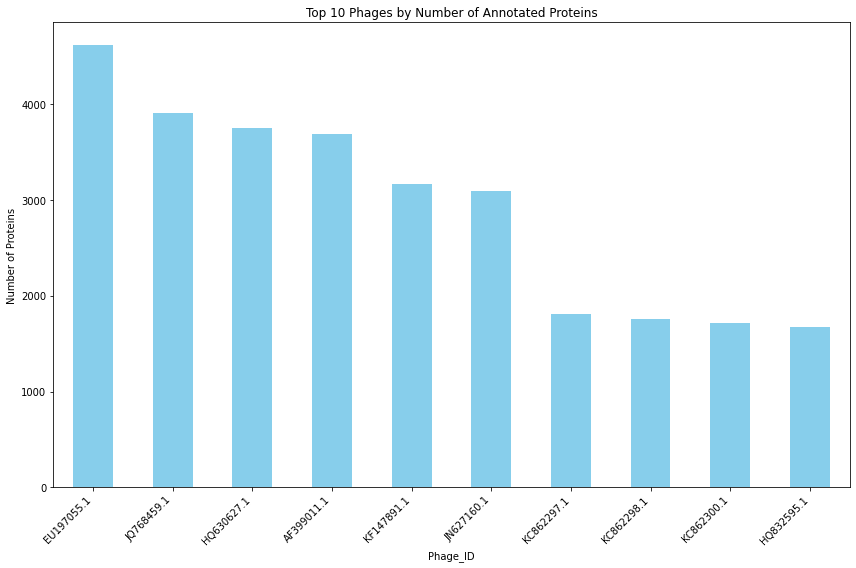

In [19]:
df = pd.read_csv('cleaned_phage_data.csv')

# Top 10 phages by number of annotated proteins
top_10_protein_count = protein_count_per_phage.sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 8))
top_10_protein_count.plot(kind='bar', color='skyblue')
plt.title('Top 10 Phages by Number of Annotated Proteins')
plt.xlabel('Phage_ID')
plt.ylabel('Number of Proteins')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [15]:
# Total number of unique functions across all phages
total_unique_functions = pd.Series(df['Product'].dropna().unique())
total_number_of_functions = len(total_unique_functions)

print("\nNumber and List of Annotated Functions per Phage:")
print(functions_summary_df)

print("\nTotal number of unique annotated functions across all phages:")
print(total_number_of_functions)



Number and List of Annotated Functions per Phage:
                                                    Number of Functions  \
Phage_ID                                                                  
7035.1.59396.CACAC_Malaspina_NODE_1016_length_1...                   12   
7035.1.59396.CACAC_Malaspina_NODE_824_length_13...                    9   
7037.1.59410.ACACG_Malaspina_NODE_1348_length_1...                    9   
7037.1.59410.ACACG_Malaspina_NODE_405_length_22...                   12   
7037.1.59410.ACACG_Malaspina_NODE_431_length_21...                   18   
...                                                                 ...   
ivig_990                                                             46   
ivig_991                                                             23   
ivig_995                                                             51   
ivig_997                                                             48   
ivig_998                                         

In [16]:
# Identify unannotated phages (Protein_ID or Product is NaN)
df = pd.read_csv('cleaned_phage_data_without_duplicates.csv')
unannotated_phages = df[df['Protein_ID'].isna() | df['Product'].isna()]['Phage_ID'].unique()

print("\nList of unannotated phages:")
print(unannotated_phages)

# Count total number of unannotated phages
total_unannotated_phages = len(unannotated_phages)
print(f"\nTotal number of phages with no linkes annotated proteins: {total_unannotated_phages}")


List of unannotated phages:
['6982.1.58137.GGACC_Malaspina_NODE_229_length_24020_cov_10.776970'
 '6982.1.58137.GGACC_Malaspina_NODE_507_length_14625_cov_7.825818'
 '6982.1.58137.GGACC_Malaspina_NODE_512_length_14558_cov_7.423590' ...
 'uvig_95691' 'uvig_99447' 'uvig_99639']

Total number of unannotated phages: 14909


we will then omit these 14909 phages from our final database. there must most probably exist proteins linked to these pahges but due to the size of our database already and the availiabluly of unknown annotated proteins, whihc is our goal to find, we will focus on these.### Adding the lenght of the sequences of these proteins

### Adding the lenght of the sequences of the proteins in order to see if there is a link between length and % of unknown functions or if it is random

In [4]:
# Using the cleaned phage data, we are going to add the start and stop of each protein to determine the length

import pandas as pd
import glob


cleaned_df = pd.read_csv('cleaned_phage_data.csv')

tsv_files = glob.glob('annotated_protein_metadata/*.tsv')
tsv_dataframes = []

for file in tsv_files:
    tsv_df = pd.read_csv(file, delimiter='\t')
    tsv_dataframes.append(tsv_df[['Protein_ID', 'Start', 'Stop']])  

combined_tsv_df = pd.concat(tsv_dataframes, ignore_index=True)

merged_df = pd.merge(cleaned_df, combined_tsv_df, on='Protein_ID', how='left')

merged_df.to_csv('cleaned_phage_data_with_start_stop.csv', index=False)

print("Merging complete. Data saved to 'cleaned_phage_data_with_start_stop.csv'.")

/tmp/ipykernel_1508998/4117114415.py:18: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  tsv_df = pd.read_csv(file, delimiter='\t')
/tmp/ipykernel_1508998/4117114415.py:18: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  tsv_df = pd.read_csv(file, delimiter='\t')
/tmp/ipykernel_1508998/4117114415.py:18: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  tsv_df = pd.read_csv(file, delimiter='\t')


Merging complete. Data saved to 'cleaned_phage_data_with_start_stop.csv'.


In [12]:
# Add length column as (stop - start) / 3
merged_df['Length'] = ((merged_df['Stop'] - merged_df['Start']) / 3).round(2)

final_df = merged_df.drop(columns=['Start', 'Stop'])

final_df.to_csv('cleaned_phage_data_with_length.csv', index=False)


In [19]:
import pandas as pd
df = pd.read_csv('cleaned_phage_data_with_length.csv')

# Calculate the median length
median_length = df['Length'].median()

# Categorize proteins based on their length
high_length_proteins = df[df['Length'] > median_length]
low_length_proteins = df[df['Length'] <= median_length]

# Count the number of proteins in each category
num_high_length_proteins = high_length_proteins.shape[0]
num_low_length_proteins = low_length_proteins.shape[0]

# Count the "unknown" and defined products in high length group
num_unknown_high = high_length_proteins['Product'].str.contains('unknown', case=False, na=False).sum()
num_defined_high = num_high_length_proteins - num_unknown_high

# Count the "unknown" and defined products in low length group
num_unknown_low = low_length_proteins['Product'].str.contains('unknown', case=False, na=False).sum()
num_defined_low = num_low_length_proteins - num_unknown_low

# Print the results
print(f"Number of proteins with high length (> {median_length}): {num_high_length_proteins}")
print(f"Number of proteins with low length (<= {median_length}): {num_low_length_proteins}")

print(f"\nHigh length group:")
print(f"Unknown products: {num_unknown_high}")
print(f"Defined products: {num_defined_high}")

print(f"\nLow length group:")
print(f"Unknown products: {num_unknown_low}")
print(f"Defined products: {num_defined_low}")




Number of proteins with high length (> 144.67): 1388094
Number of proteins with low length (<= 144.67): 1399693

High length group:
Unknown products: 210240
Defined products: 1177854

Low length group:
Unknown products: 633904
Defined products: 765789


In [17]:
df = pd.read_csv('cleaned_phage_data_with_length.csv')

# Find the row with the maximum length
max_length_row = df.loc[df['Length'].idxmax()]

# Find the row with the minimum length
min_length_row = df.loc[df['Length'].idxmin()]

# Print the results
print("Protein with the biggest length:")
print(f"Protein_ID: {max_length_row['Protein_ID']}, Length: {max_length_row['Length']}, Product: {max_length_row['Product']}")

print("\nProtein with the smallest length:")
print(f"Protein_ID: {min_length_row['Protein_ID']}, Length: {min_length_row['Length']}, Product: {max_length_row['Product']}")

Protein with the biggest length:
Protein_ID: YP_007675165.1, Length: 8573.67, Product: virion structural protein

Protein with the smallest length:
Protein_ID: NP_958155.2, Length: 0.67, Product: virion structural protein


### Goal 4: extracting all the phages with unnatotated proteins
we will use text mining/ based on worde recognition to extract all samples/phages that have no known fonctions, product, linked. Meaning all "unknown". we will pay attention to case-wise words as well as typos which have been noticed in the data


In [9]:
df = pd.read_csv('cleaned_phage_data.csv')
df.shape[0]

#2 785 971 proteins linked to phages

2785971

In [7]:
import pandas as pd

#rows where the 'Product' column contains the word 'unknown' (case-insensitive)
unknown_products_df = df[df['Product'].str.contains('unknown', case=False, na=False)]

unknown_products_df.to_csv('unknown_products_dataset.csv', index=False)

print(f"Number of rows with 'unknown' in Product: {len(unknown_products_df)}")

Number of rows with 'unknown' in Product: 844144


In [8]:
unknown_products_df.shape[0]

#844 144 unknown proteins before taking into account different types of typos 

844144

In [14]:
# Regular expression pattern to match "unknown" and "unknwon" (case-insensitive)
pattern = r'\b(unknown|unknwon|unkown|unknow)\b'

# Select rows where the 'Product' column contains the word 'unknown' or 'unknwon' (case-insensitive)
unknown_products_df2 = df[df['Product'].str.contains(pattern, case=False, na=False, regex=True)]

# Get the number of rows using the shape attribute
number_of_unknown_rows2 = unknown_products_df2.shape[0]

# Print the number of rows with 'unknown' or 'unknwon' in the Product column
print(f"Number of rows with 'unknown' in Product: {number_of_unknown_rows2}")

# Optionally, save the selected rows to a new CSV file
unknown_products_df2.to_csv('unknown_and_typo_products_dataset.csv', index=False)

#849 024 when taking into account various types of typos 

/tmp/ipykernel_331907/1093986570.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  unknown_products_df2 = df[df['Product'].str.contains(pattern, case=False, na=False, regex=True)]


Number of rows with 'unknown' in Product: 849024


In [1]:
#number of unique proteins in the "unknown" database = 848 299
import pandas as pd

# Load the cleaned CSV file
df = pd.read_csv('unknown_and_typo_products_dataset.csv')

# Count the number of unique Protein_IDs
number_of_unique_protein_ids = df['Protein_ID'].nunique()

# Print the number of unique Protein_IDs
print(f"Number of unique Protein_IDs: {number_of_unique_protein_ids}")

Number of unique Protein_IDs: 848299
